# **Major Clustering techniques**

1. K-means
2. K-medoids
3. Hierarchichal (aglomorative, divisive)
4. Density Based

## **K-means**

### **simple example**

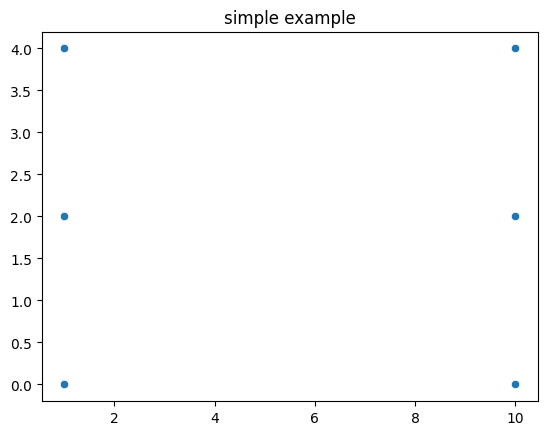

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X = np.array([[1,2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("simple example")
plt.show()

In [2]:
kmeans = KMeans(
    n_clusters = 2,
    init = 'k-means++',
    random_state = 42
).fit(X)

print("Predicted labels")
print(kmeans.labels_)

Predicted labels
[0 0 0 1 1 1]


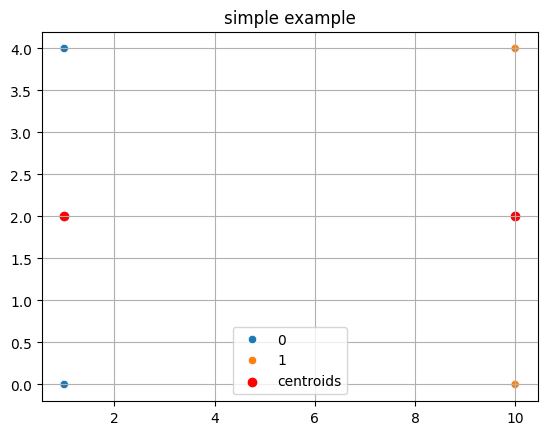

In [3]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', label='centroids')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#prediction

kmeans.predict([[0,0], [12, 3], [9, 2]])

array([0, 1, 1], dtype=int32)

### **More examples**

#### **Example - 1**

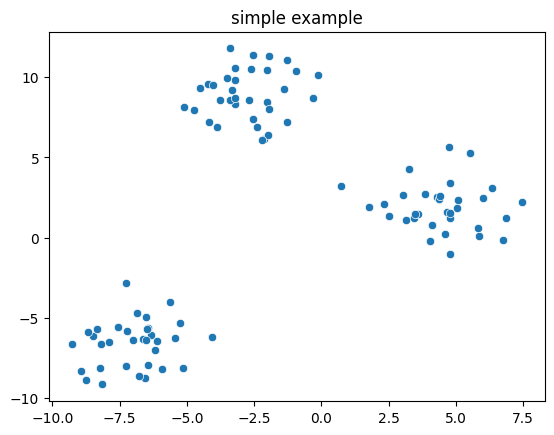

In [5]:
from sklearn.datasets import make_blobs

X,y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=3,
    cluster_std=1.5,
    shuffle=True,
    random_state=42
)

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("simple example")
plt.show()

In [6]:
k = 3

kmeans = KMeans(
    n_clusters = k,
    init = 'k-means++',
    random_state = 42
).fit(X)

print("Predicted labels")
print(kmeans.labels_)

Predicted labels
[1 2 0 2 1 2 0 2 2 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 2 1 1 1 1 2 2 1 0 0 0
 0 2 2 1 0 2 0 0 2 1 1 1 2 2 2 0 1 1 1 0 0 2 0 1 2 1 2 1 1 2 1 2 2 2 1 1 0
 2 1 2 1 2 2 0 2 0 1 0 0 0 2 0 2 2 2 0 2 0 0 0 2 1 0]


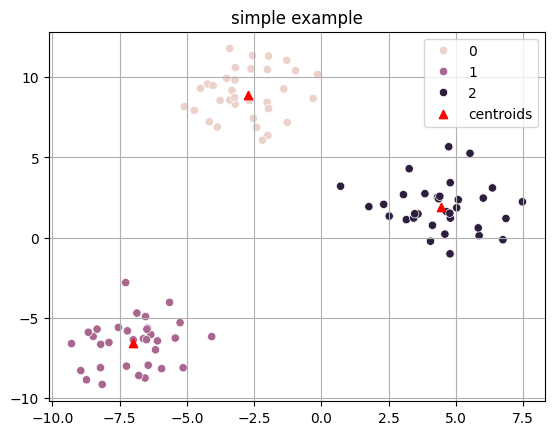

In [7]:
# plotting with predited labels

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

#### **Example - 2**

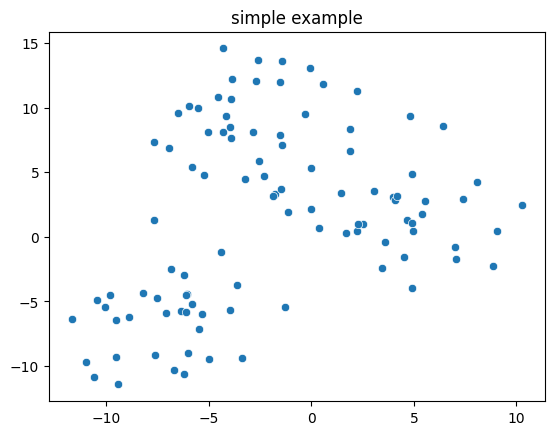

In [8]:
from sklearn.datasets import make_blobs

X,y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=3,
    cluster_std=3,
    shuffle=True,
    random_state=42
)

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("simple example")
plt.show()

In [9]:
k = 2

kmeans = KMeans(
    n_clusters = k,
    init = 'k-means++',
    random_state = 42
).fit(X)

print("Predicted labels")
print(kmeans.labels_)

Predicted labels
[1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


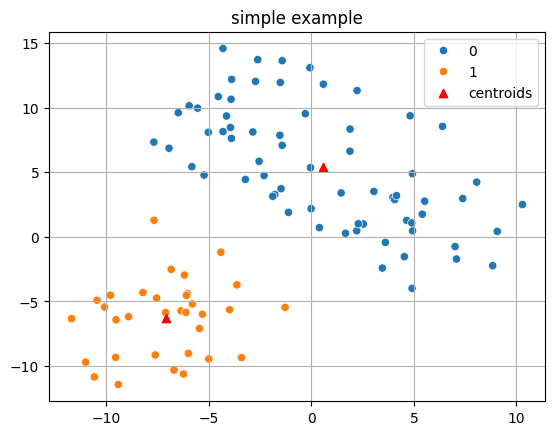

In [10]:
# plotting with predited labels

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
k = 3

kmeans = KMeans(
    n_clusters = k,
    init = 'k-means++',
    random_state = 42
).fit(X)

print("Predicted labels")
print(kmeans.labels_)

Predicted labels
[1 2 0 2 1 2 0 2 2 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 2 1 1 1 1 2 2 1 0 0 0
 0 2 2 1 0 2 0 0 2 1 1 1 2 0 2 0 1 1 1 0 0 2 0 1 2 1 2 1 1 0 1 2 2 2 1 1 0
 2 1 2 1 2 2 0 2 0 1 0 0 0 0 0 2 2 2 0 2 0 0 0 2 1 0]


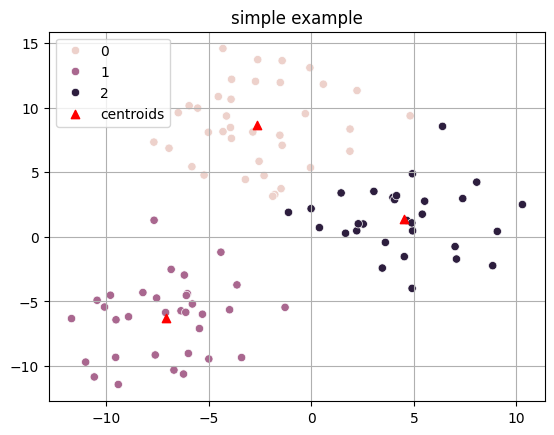

In [12]:
# plotting with predited labels

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

### **Best K value selection**

#### **Elbow method**

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(
    n_samples=200,
    n_features=2,
    centers=4,
    cluster_std=2,
    shuffle=True,
    random_state=42
)

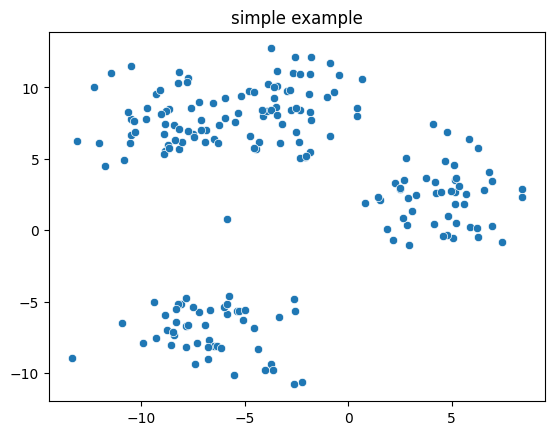

In [14]:
# plotting

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("simple example")
plt.show()

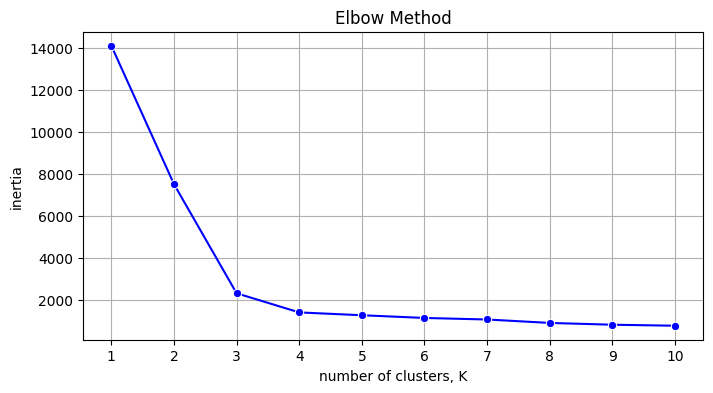

In [15]:
inertias = []
Ks = range(1, 11)

for k in Ks:
    kmeans = KMeans(
        n_clusters = k,
        init = 'k-means++',
        random_state = 42
    ).fit(X)
    inertias.append(kmeans.inertia_) # nothing but sum of squared errors (SSE)

plt.figure(figsize=(8,4))
sns.lineplot(x = Ks, y = inertias, marker = 'o', color='blue')
plt.xlabel('number of clusters, K')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.xticks(Ks)
plt.grid(True)
plt.show()

so k = 3 or k = 4 gives good results

Predicted labels


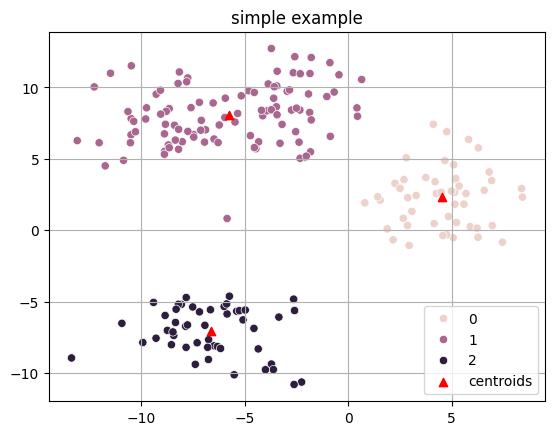

In [16]:
k = 3

kmeans = KMeans(
    n_clusters = k,
    init = 'k-means++',
    random_state = 42
).fit(X)

print("Predicted labels")
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


#plotting
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

Predicted labels


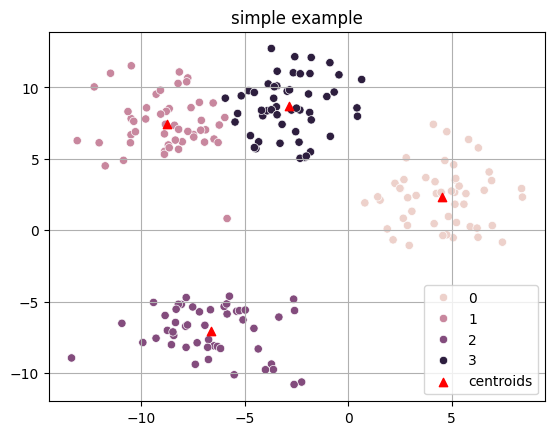

In [17]:
k = 4

kmeans = KMeans(
    n_clusters = k,
    init = 'k-means++',
    random_state = 42
).fit(X)

print("Predicted labels")
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


#plotting
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

### **Problems with k-means**

#### **With outlier data**

The centroids changes alot, so future predictions will effect more

In [18]:
X,y = make_blobs(
    n_samples=10,
    n_features=2,
    centers=3,
    cluster_std=1,
    shuffle=True,
    random_state=42
)

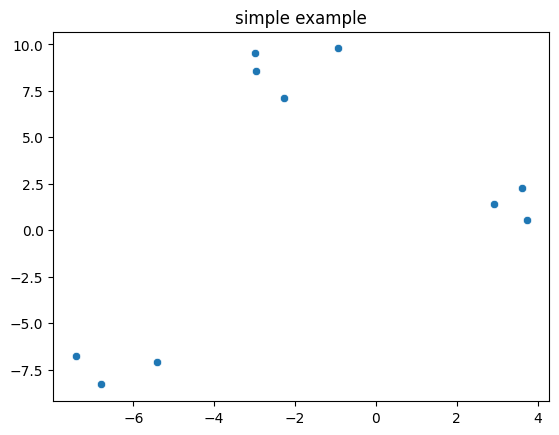

In [19]:
# plotting

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("simple example")
plt.show()

From observation,

we can decide that, number of clusters are 3, and the centroids are correctly settled at the center

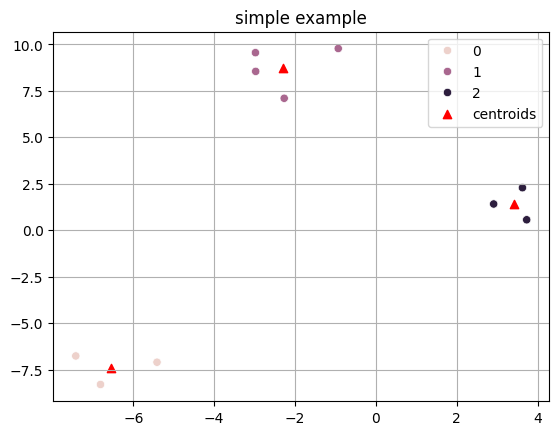

In [20]:
kmeans = KMeans(
    n_clusters =3,
    init = 'k-means++',
    random_state = 42
).fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

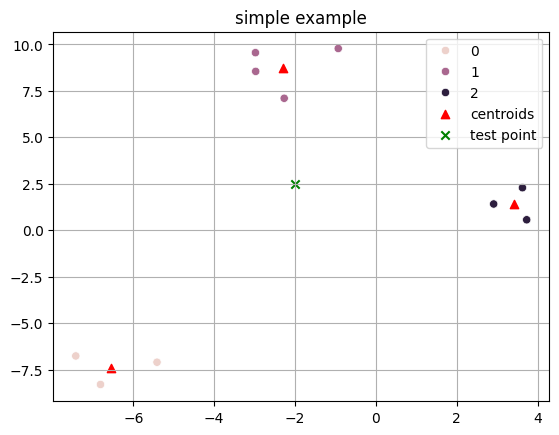

Test point: [-2, 2.5]
Predicted cluster of the test point: [2]


In [21]:
# say there is a test point [-2, 2.5]
test_point = np.array([[-2, 2.5]])


# plotting
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.scatter(test_point[:, 0], test_point[:, 1], c='green', marker='x', label='test point')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

# test point cluster prediction
print(f"Test point: {[-2, 2.5]}")
print(f"Predicted cluster of the test point: {kmeans.predict(test_point)}")

So, as predicted, the test point belonged to cluster '2'

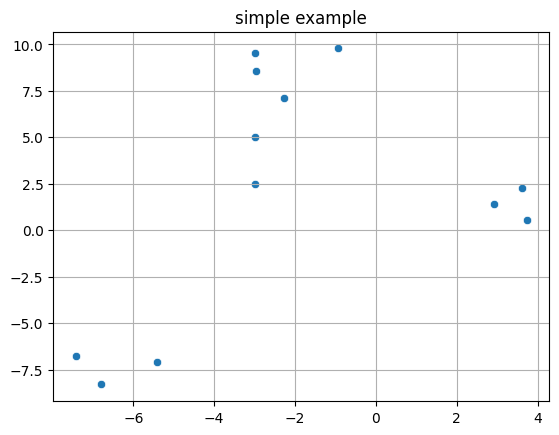

In [23]:
# say there is a outlier point at [-3, 2.5]
X = np.vstack((X, np.array([[-3, 2.5]])))

#plotting
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("simple example")
plt.grid(True)
plt.show()

Due to the outlier, the centroid positions changes

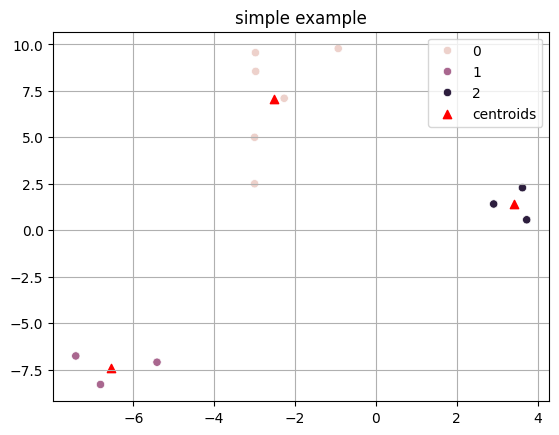

In [24]:
kmeans = KMeans(
    n_clusters =3,
    init = 'k-means++',
    random_state = 42
).fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

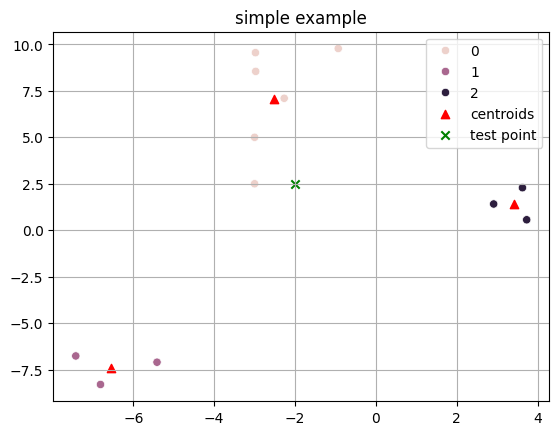

Test point: [-2, 2.5]
Predicted cluster of the test point: [0]


In [25]:
# say there is a test point [-2, 2.5]
test_point = np.array([[-2, 2.5]])


# plotting
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.scatter(test_point[:, 0], test_point[:, 1], c='green', marker='x', label='test point')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

# test point cluster prediction
print(f"Test point: {[-2, 2.5]}")
print(f"Predicted cluster of the test point: {kmeans.predict(test_point)}")

We can observe that, the prediction of test point changes (due to outlier)

#### **with Initial centroids selection**

In [26]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

In [27]:
# Different initializations
kmeans_random1 = KMeans(n_clusters=3, init='random', n_init=1, random_state=1)
kmeans_random2 = KMeans(n_clusters=3, init='random', n_init=1, random_state=100)

In [28]:
y_pred1 = kmeans_random1.fit_predict(X)
y_pred2 = kmeans_random2.fit_predict(X)

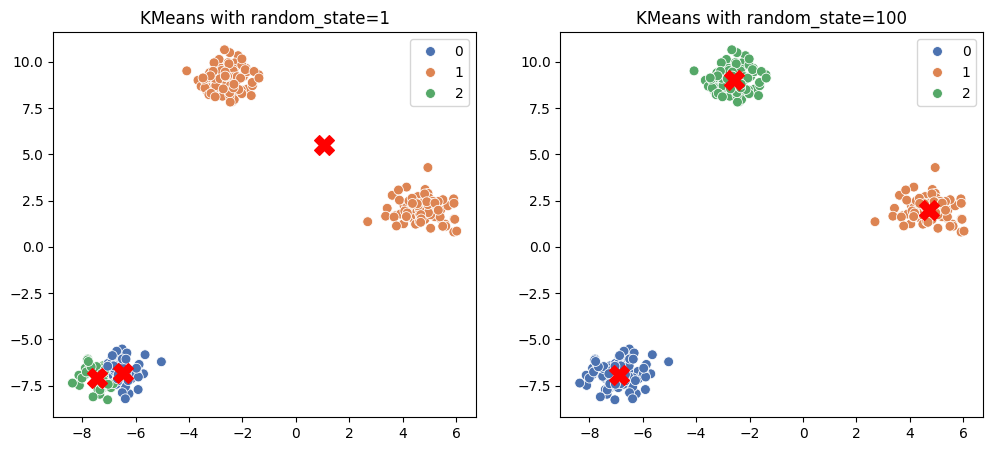

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred1, palette="deep", ax=axes[0], s=50)
axes[0].scatter(kmeans_random1.cluster_centers_[:, 0],
                kmeans_random1.cluster_centers_[:, 1],
                s=200, c='red', marker='X')
axes[0].set_title("KMeans with random_state=1")

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred2, palette="deep", ax=axes[1], s=50)
axes[1].scatter(kmeans_random2.cluster_centers_[:, 0],
                kmeans_random2.cluster_centers_[:, 1],
                s=200, c='red', marker='X')
axes[1].set_title("KMeans with random_state=100")

plt.show()

#### **With data distribution**

k-means fails with some data distributions

##### **Example-1**

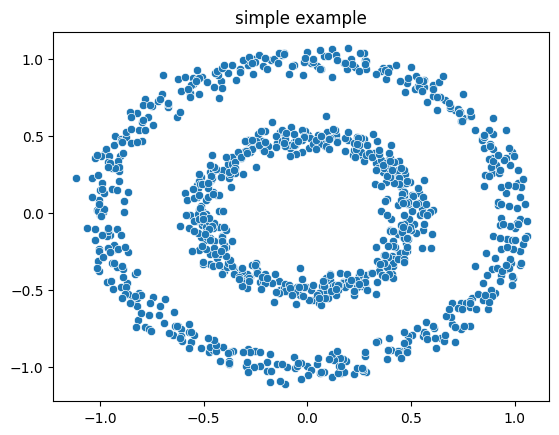

In [30]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("simple example")
plt.show()

From observation, we can assume that,

inner circle should be one cluster, and outer should be other cluster

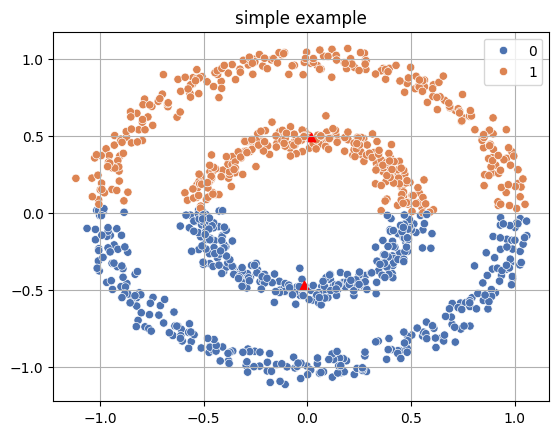

In [31]:
# with KMeans

kmeans = KMeans(
    n_clusters = 2,
    init = 'k-means++',
    n_init=1000,
    random_state = 42
).fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="deep")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.title("simple example")
plt.grid(True)
plt.show()

We can observe that, the clusters predicted by k means are different from assumptions

##### **Example-2**

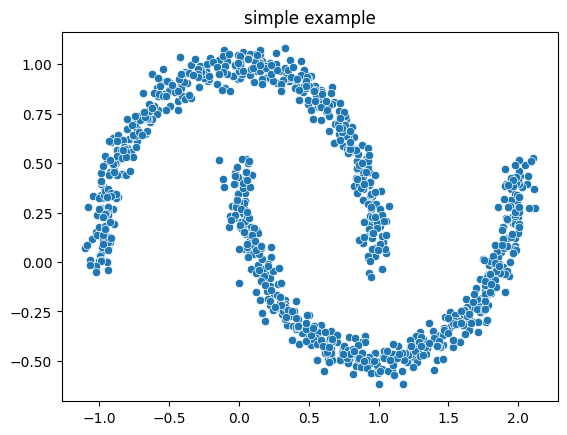

In [32]:
from sklearn.datasets import make_moons

X,  y = make_moons(n_samples=1000, noise=0.05, random_state=42)

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("simple example")
plt.show()

The two moons should be two clusters

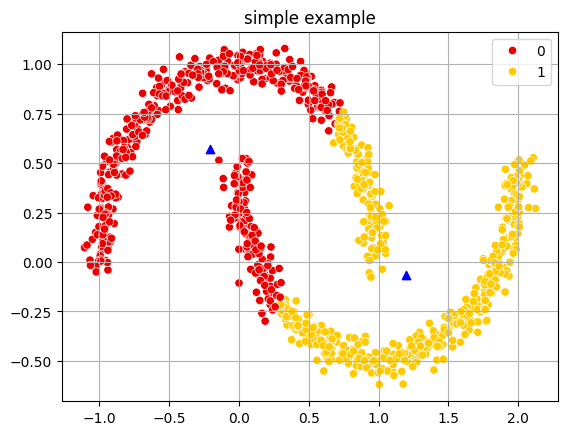

In [33]:
# predicting the clusters using kmeans

kmeans = KMeans(
    n_clusters = 2,
    init = 'k-means++',
    n_init=1000,
    random_state = 42
).fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="hot")
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue',marker='^', label='centroids')
plt.title("simple example")
plt.grid(True)
plt.show()

The predictions by the kmeans changes